In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# read the data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/german-credit.csv")
bad_loan = df['good.loan'] - 1

In [2]:
# use only numeric data, and scale it
df = df[["duration.in.months", "amount", "percentage.of.disposable.income", "at.residence.since", 
              "age.in.years", "num.credits.at.bank"]]
X = df.apply(zscore).values
y = bad_loan.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
df

,duration.in.months,amount,percentage.of.disposable.income,at.residence.since,age.in.years,num.credits.at.bank
0,6,1169,4,4,67,2
1,48,5951,2,2,22,1
2,12,2096,2,3,49,1
3,42,7882,2,4,45,1
4,24,4870,3,4,53,2
...,...,...,...,...,...,...
995,12,1736,3,4,31,1
996,30,3857,4,4,40,1
997,12,804,4,4,38,1
998,45,1845,4,4,23,1


In [19]:
# see how knn classifier works as training size changes

def doTheThing(k):

    knn = KNeighborsClassifier(n_neighbors=k)
    te_errs = []
    tr_errs = []
    tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
    for tr_size in tr_sizes:
      X_train1 = X_train[:tr_size,:]
      y_train1 = y_train[:tr_size]
  
      # train model on a subset of the training data
      knn.fit(X_train1, y_train1)

      # error on subset of training data
      tr_predicted = knn.predict(X_train1)
      err = (tr_predicted != y_train1).mean()
      tr_errs.append(err)
  
      # error on all test data
      te_predicted = knn.predict(X_test)
      err = (te_predicted != y_test).mean()
      te_errs.append(err)
    return te_errs, tr_errs, tr_sizes



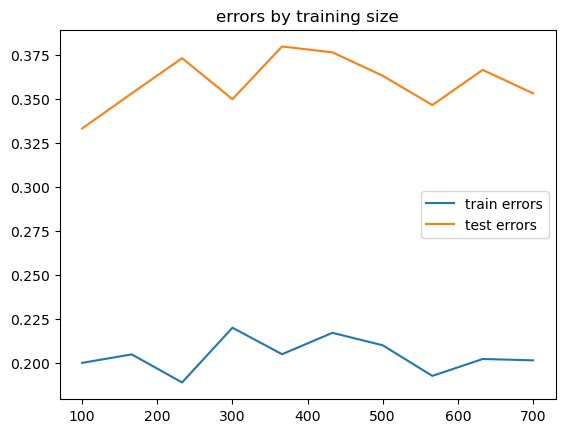

In [21]:
te_errs, tr_errs, tr_sizes = doTheThing(3)
plt.plot(tr_sizes, tr_errs, label='train errors')
plt.plot(tr_sizes, te_errs, label='test errors')
plt.legend()
plt.title('errors by training size');

4. Extend the code by adding a loop so that you produce learning curves for k = 1, 3, 5, 
and 9.  Put all the plots on one page.  Put the value of k in the title of the learning curve 
plot.

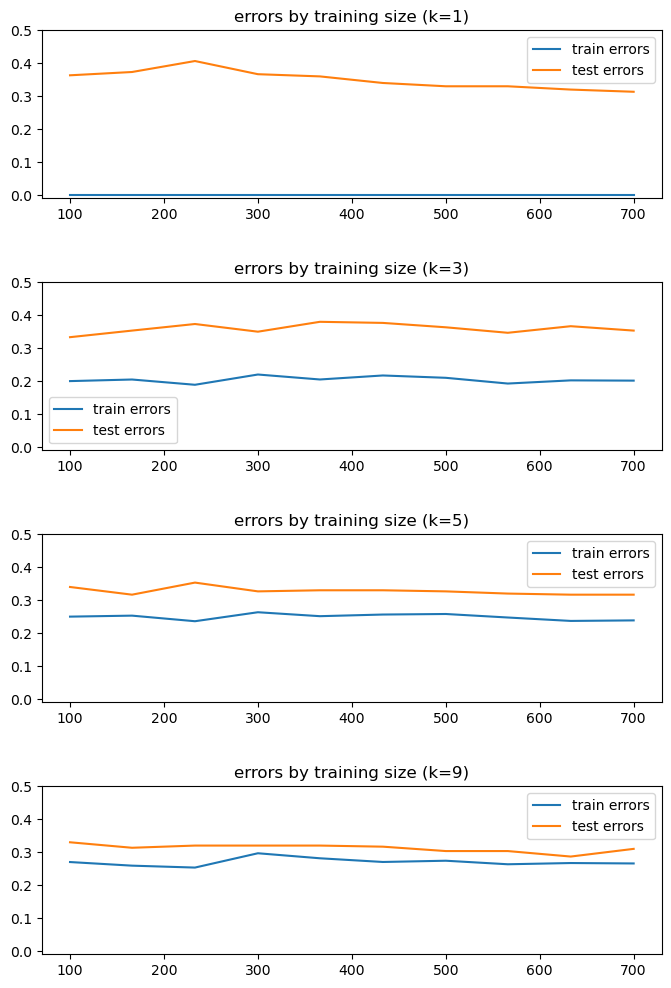

In [50]:
ks = [1, 3, 5, 9]
fig, axs = plt.subplots(4, figsize=(8, 12))
for i, k in enumerate(ks):
    te_errs, tr_errs, tr_sizes = doTheThing(k)
    axs[i].plot(tr_sizes, tr_errs, label='train errors')
    axs[i].plot(tr_sizes, te_errs, label='test errors')
    axs[i].set_title('errors by training size (k='+str(k)+')')
    axs[i].legend()
    axs[i].set_ylim([-0.01, 0.5])
fig.subplots_adjust(hspace=0.5)



5. Explain the curves you get.  For example, what’s with the low training error when k = 
1?

The low errors on the training data for k=1 is expected because its over fit meaning each point will map to itself giving a 100% accuracy. But the test error is high. As the number of neighbors increase, the errors on the test data and training data begin to converge. k=9 provided the best results


6. What do the learning curves tell you?   Write some sentences to explain what the 
learning curves tell you about bias and variance.

In otherwords, k=1 provided a high variance which improved as k increased. I dont think an extremely high bias was reached by k=9 because our error didn't start to increase again
